In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
from datetime import datetime

### Import

In [10]:
udary = pd.read_csv('/Users/tomasz/Downloads/projekt MZ/dane_udary.csv', delimiter = ';', encoding='unicode_escape')
historia = pd.read_csv('/Users/tomasz/Downloads/projekt MZ/historia_pacjenta_udarowego.csv', delimiter = ';', encoding='unicode_escape')
#df = historia.join(udary, how = 'inner', on=('ID_PACJ', 'DATA_UDARU'))

### Data things

In [11]:
udary.head()

,DATA_UDARU,DATA_WYPISU,ID_PACJ,PLEC,TERYT_KOMORKI,TERYT_PACJ,WIEK,CZAS_DO_ZGONU,PONOWNY_UDAR_90_DNI,TROMBOLIZA
0,2016-04-09,2016-04-20,7290B1CF5A592044A14AF36D4E33C4F1,M,264039,1415042,45,-1,True,1
1,2016-02-27,2016-03-25,1ADF5DAB414DF2CE3E4B1F5045F3F8A9,K,262011,262011,68,153,False,0
2,2016-02-14,2016-02-25,97F6E19A57BC07E300F9096F3138618A,M,264029,264059,78,0,False,0
3,2016-10-13,2016-10-17,DC07BF5356FF0F9DBC1067B9A176014C,K,210011,1432022,61,-1,True,0
4,2016-12-22,2016-12-22,862D3038D0268542584832344E26963B,M,264029,216054,44,-1,False,0


In [14]:
historia.head()

,ID_PACJ,DATA_ROZPOZNANIA,DATA_UDARU,DNI_PRZED_UDAREM,KATEGORIA_ROZPOZNANIA
0,1ADF5DAB414DF2CE3E4B1F5045F3F8A9,2014-10-16,2016-02-27,499.0,Inne choroby uk³adu oddechowego
1,1ADF5DAB414DF2CE3E4B1F5045F3F8A9,2015-09-07,2016-02-27,173.0,Inne choroby uk³adu oddechowego
2,F8687B51A92264337C803BBD80830C0F,2014-11-21,2016-06-24,581.0,Inne choroby uk³adu oddechowego
3,B31824C53493B293C324D308DCBCC036,2014-03-05,2016-01-03,669.0,Inne choroby uk³adu oddechowego
4,B31824C53493B293C324D308DCBCC036,2015-03-02,2016-01-03,307.0,Inne choroby uk³adu oddechowego


In [22]:
udary['ZGON'] = np.where(udary['CZAS_DO_ZGONU']>0, 1, 0)

,DATA_UDARU,DATA_WYPISU,ID_PACJ,PLEC,TERYT_KOMORKI,TERYT_PACJ,WIEK,CZAS_DO_ZGONU,PONOWNY_UDAR_90_DNI,TROMBOLIZA,ZGON
0,2016-04-09,2016-04-20,7290B1CF5A592044A14AF36D4E33C4F1,M,264039,1415042,45,-1,True,1,0
1,2016-02-27,2016-03-25,1ADF5DAB414DF2CE3E4B1F5045F3F8A9,K,262011,262011,68,153,False,0,1
2,2016-02-14,2016-02-25,97F6E19A57BC07E300F9096F3138618A,M,264029,264059,78,0,False,0,0
3,2016-10-13,2016-10-17,DC07BF5356FF0F9DBC1067B9A176014C,K,210011,1432022,61,-1,True,0,0
4,2016-12-22,2016-12-22,862D3038D0268542584832344E26963B,M,264029,216054,44,-1,False,0,0


### Objects to datetime

In [71]:
udary['DATA_WYPISU'] = pd.to_datetime(udary['DATA_WYPISU'])
udary['DATA_UDARU'] = pd.to_datetime(udary['DATA_WYPISU'])


TypeError: cannot convert the series to <class 'int'>

### Plots

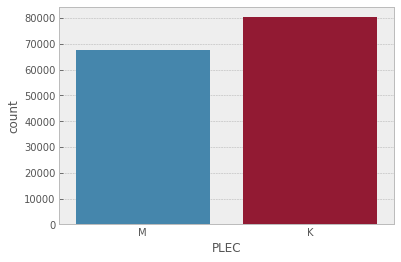

In [63]:
sns.countplot(udary['PLEC'])

Text(0.5, 1.0, 'Histogram of age')

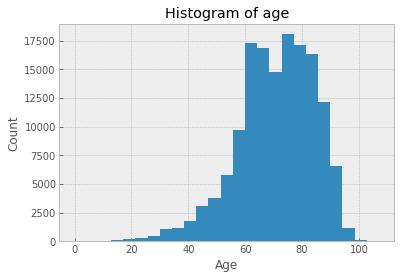

In [64]:
plt.hist(udary['WIEK'], bins=25)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of age')

In [68]:
udary['CZAS_W_SZPITALU'].value_counts()

0 days    147861
Name: CZAS_W_SZPITALU, dtype: int64